# Proyecto Final.

## Requisitos.

Utilizando la base de conjunto de datos proporcionada encuentra un modelo de clasificación con sus parametros utilizando cross validation con el criterio ROC_auc que te de un valor mayor al 0.75 en el conjunto de validación y prueba.


## Importar librerías y cargar la base de datos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
import statsmodels.formula.api as smf


plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')


# Configuración warnings
import warnings
warnings.filterwarnings('ignore')

## Importar base de datos

In [2]:
df = pd.read_csv('train.csv', header = 0, delimiter = ',')

In [3]:
df.shape

(9239, 10)

In [4]:
df.head()

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate,engagement
0,1,9,7.753995,16310,75.583936,0.553664,0.034049,2.997753,0.0,True
1,2,6,8.305269,15410,86.870523,0.584498,0.018763,2.635789,0.0,False
2,3,3,7.965583,15680,81.915968,0.605685,0.030720,2.538095,0.0,False
3,4,9,8.142877,15610,80.148937,0.593664,0.016873,2.259055,0.0,False
4,5,9,8.161250,14920,76.907549,0.581637,0.023412,2.420000,0.0,False


## Exploración de data

### Identificar valores nulos

In [5]:
df.isna().sum()

id                            0
title_word_count              0
document_entropy              0
freshness                     0
easiness                      0
fraction_stopword_presence    0
normalization_rate            0
speaker_speed                 0
silent_period_rate            0
engagement                    0
dtype: int64

Ninguna variable contiene valores nulos.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9239 entries, 0 to 9238
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          9239 non-null   int64  
 1   title_word_count            9239 non-null   int64  
 2   document_entropy            9239 non-null   float64
 3   freshness                   9239 non-null   int64  
 4   easiness                    9239 non-null   float64
 5   fraction_stopword_presence  9239 non-null   float64
 6   normalization_rate          9239 non-null   float64
 7   speaker_speed               9239 non-null   float64
 8   silent_period_rate          9239 non-null   float64
 9   engagement                  9239 non-null   bool   
dtypes: bool(1), float64(6), int64(3)
memory usage: 658.8 KB


## Variable objetivo (Target)

Riesgo de ataque cardíaco:  presencia de riesgo de diabetes - 1: Sí, 0: No

In [7]:
df.groupby('engagement').size()

engagement
False    8342
True      897
dtype: int64

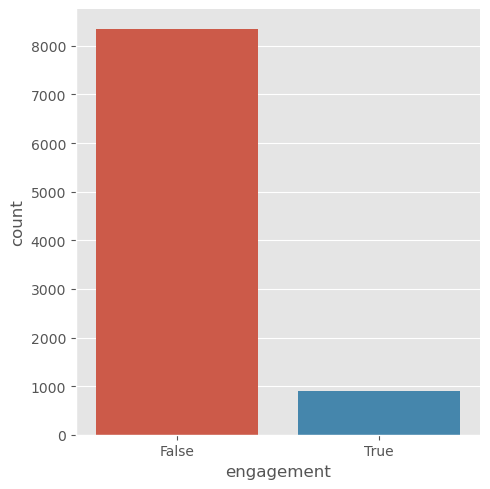

In [8]:
sns.catplot(x = 'engagement', kind = "count", data = df)

## Variables Cuantitativas 

In [9]:
df.describe()

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate
count,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000
mean,4620.000000,7.701050,7.792685,14808.587509,84.756029,0.612214,0.021354,2.413320,0.146606
std,2667.213902,3.785066,0.697710,1208.953646,8.303489,0.051872,0.009545,1.588296,0.172030
min,1.000000,1.000000,0.000000,10830.000000,28.210966,0.000000,0.000000,0.000302,0.000000
25%,2310.500000,5.000000,7.594235,14070.000000,80.415060,0.589632,0.014974,1.976727,0.000000
50%,4620.000000,7.000000,7.875103,14750.000000,84.482122,0.613127,0.019843,2.267133,0.104915
75%,6929.500000,10.000000,8.164166,15600.000000,88.388711,0.634585,0.026288,2.539207,0.250927
max,9239.000000,33.000000,9.278573,17430.000000,122.032000,1.000000,0.101990,50.850000,1.168239


Analizando las variables numericas Pregnancies, Glucose, BloodPressure, SkinThickness, BMI y Age no se evidencian outliers, ya que la media > std.

Donde podría haber outliers es en la variable Insulina ya que meadi < std.

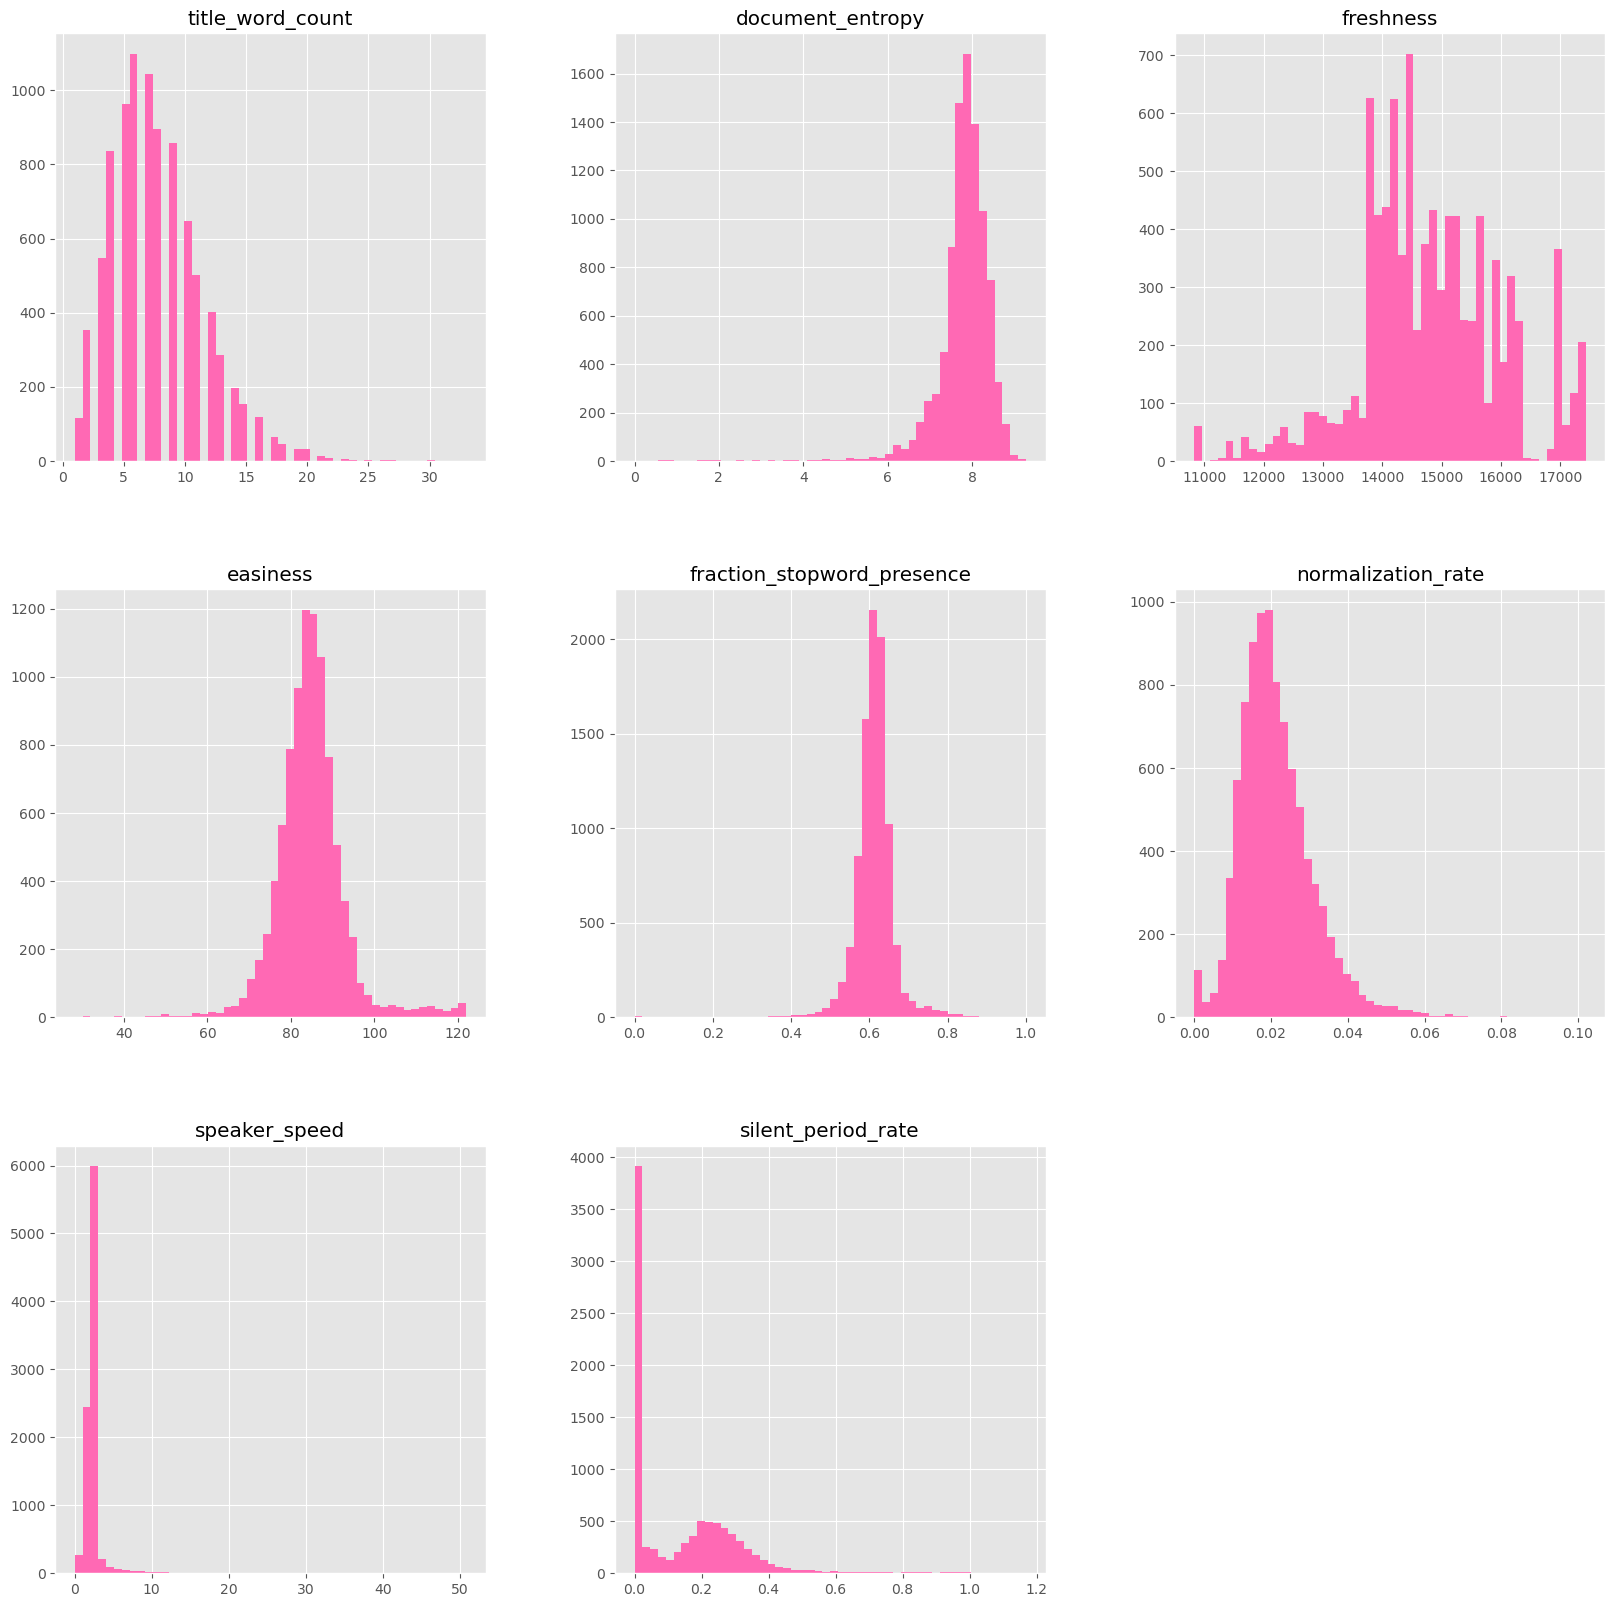

In [10]:
Var=['title_word_count', 'document_entropy', 'freshness', 'easiness', 'fraction_stopword_presence',
     'normalization_rate', 'speaker_speed', 'silent_period_rate']

df[Var].hist(bins=50 ,figsize=(20,20), color='hotpink')

plt.show()

### Correlación de variables:

In [11]:
variable_categorica = ['engagement']

In [12]:
#Transformación de variables categóricas a numéricas

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

for column in variable_categorica:
    df[column] = label_encoder.fit_transform(df[column])

df.head()

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate,engagement
0,1,9,7.753995,16310,75.583936,0.553664,0.034049,2.997753,0.0,1
1,2,6,8.305269,15410,86.870523,0.584498,0.018763,2.635789,0.0,0
2,3,3,7.965583,15680,81.915968,0.605685,0.030720,2.538095,0.0,0
3,4,9,8.142877,15610,80.148937,0.593664,0.016873,2.259055,0.0,0
4,5,9,8.161250,14920,76.907549,0.581637,0.023412,2.420000,0.0,0


In [13]:
df.describe()

,id,title_word_count,document_entropy,freshness,easiness,fraction_stopword_presence,normalization_rate,speaker_speed,silent_period_rate,engagement
count,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000,9239.000000
mean,4620.000000,7.701050,7.792685,14808.587509,84.756029,0.612214,0.021354,2.413320,0.146606,0.097088
std,2667.213902,3.785066,0.697710,1208.953646,8.303489,0.051872,0.009545,1.588296,0.172030,0.296094
min,1.000000,1.000000,0.000000,10830.000000,28.210966,0.000000,0.000000,0.000302,0.000000,0.000000
25%,2310.500000,5.000000,7.594235,14070.000000,80.415060,0.589632,0.014974,1.976727,0.000000,0.000000
50%,4620.000000,7.000000,7.875103,14750.000000,84.482122,0.613127,0.019843,2.267133,0.104915,0.000000
75%,6929.500000,10.000000,8.164166,15600.000000,88.388711,0.634585,0.026288,2.539207,0.250927,0.000000
max,9239.000000,33.000000,9.278573,17430.000000,122.032000,1.000000,0.101990,50.850000,1.168239,1.000000


In [14]:
todas_las_variables = ['title_word_count', 'document_entropy', 'freshness', 'easiness', 'fraction_stopword_presence',
     'normalization_rate', 'speaker_speed', 'silent_period_rate', 'engagement']

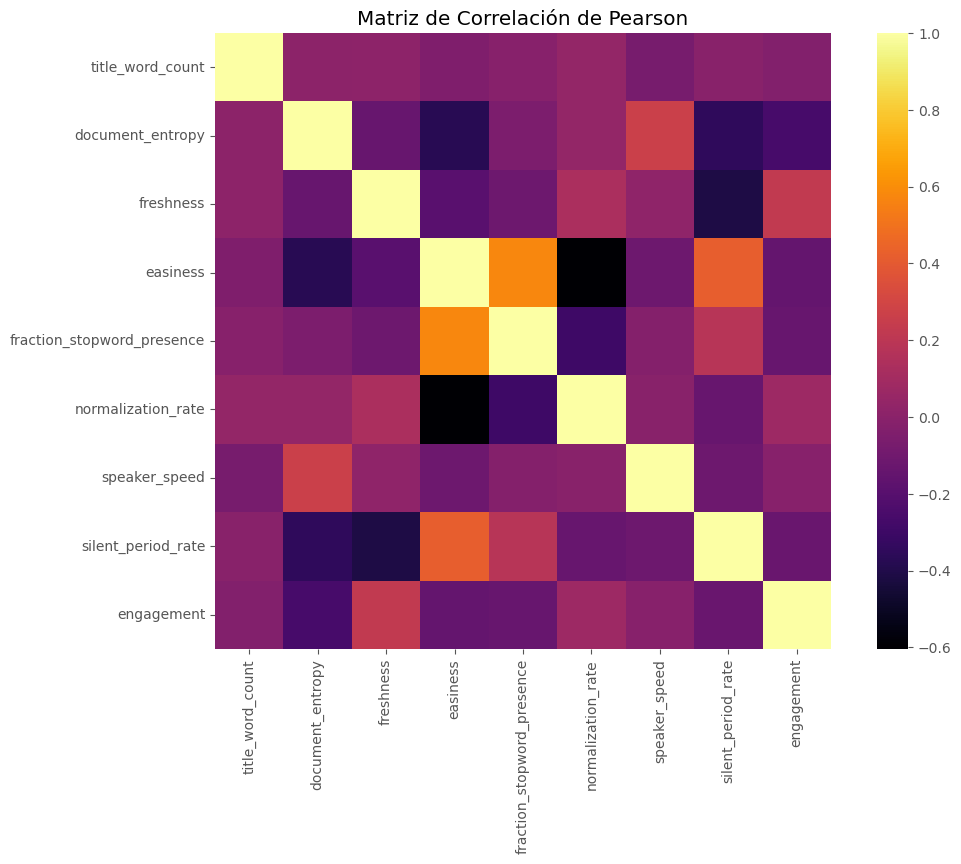

In [15]:
# Calcular la matriz de correlación de Pearson

corr = df[todas_las_variables].corr()


# Gráfico de la matriz de correlación

plt.figure(figsize=(12, 8))
sns.heatmap(corr, cmap='inferno', square=True)
plt.title('Matriz de Correlación de Pearson')
plt.show()

In [16]:
print(df.corr()) 

                                  id  title_word_count  document_entropy  \
id                          1.000000          0.005341         -0.005961   
title_word_count            0.005341          1.000000          0.007861   
document_entropy           -0.005961          0.007861          1.000000   
freshness                   0.015104          0.010169         -0.140501   
easiness                    0.004669         -0.040933         -0.376209   
fraction_stopword_presence  0.002193         -0.014945         -0.057805   
normalization_rate         -0.001831          0.039705          0.038679   
speaker_speed               0.001404         -0.076406          0.264153   
silent_period_rate          0.002241         -0.007335         -0.352060   
engagement                  0.021167         -0.030120         -0.263970   

                            freshness  easiness  fraction_stopword_presence  \
id                           0.015104  0.004669                    0.002193   
title

Las variables con mayor relación entre ellas son:
- *easiness* con *normalization_rate* con una correlación negativa, 
- *easiness* también se relaciona con *fraction_stopword_presence* y *silent_period_rate* de forma positiva.

## Dataset Preparation 

In [17]:
# Variables numéricas. En este modelo representan las variables independientes.

X = df[['title_word_count', 'document_entropy', 'freshness', 'easiness', 'fraction_stopword_presence',
     'normalization_rate', 'speaker_speed', 'silent_period_rate']]


# Variable Categórica. La que queremos predecir. 

y = df[['engagement']]

In [18]:
y.value_counts()

engagement
0             8342
1              897
Name: count, dtype: int64

### Creamos el modelo

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size=0.8,
                                                    test_size = 0.2, 
                                                    random_state = 4)


In [21]:
df_train = pd.concat([X_train,y_train],axis=1)

In [22]:
df_train.shape

(7391, 9)

In [23]:
model = DecisionTreeClassifier() 

In [24]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
# Generar la predicción

y_pred = model.predict(X_test)

In [26]:
# Evaluar con las métricas referenciales

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

Accuracy DATOS ORIGINALES: 89.99%


In [27]:
ll = log_loss(y_test, y_pred)
print("Log Loss: {}".format(ll))

Log Loss: 3.608266167200581


El modelo anterior tiene un **accuracy** de casi el 90%.

AHORA VEAMOS LA MATRIZ DE CONFUSION: Para analizar mas afondo como ha trabajado el modelo con los datos reales.

Matriz de Confusión - DATOS ORIGINALES:
 [[1572   97]
 [  88   91]]
Métricas de Matriz de Confusión - DATOS ORIGINALES:
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1669
           1       0.48      0.51      0.50       179

    accuracy                           0.90      1848
   macro avg       0.72      0.73      0.72      1848
weighted avg       0.90      0.90      0.90      1848



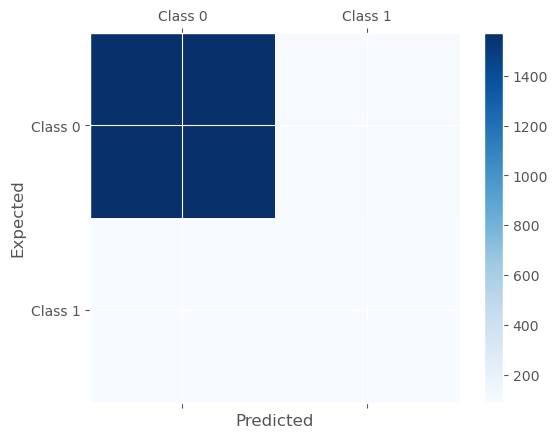

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt


#--------------------------------------------------------------------
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
#--------------------------------------------------------------------

print('Matriz de Confusión - DATOS ORIGINALES:\n', conf_mat)

print('Métricas de Matriz de Confusión - DATOS ORIGINALES:\n',classification_report(y_test,y_pred))

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

### Validación cruzada con K-Fold

In [29]:
# Acá indicamos cuantos fold queremos

kfold_validacion = KFold(10) 

In [30]:
resultados = cross_val_score(model, X, y, cv = kfold_validacion)
print(resultados)

resultados.mean() # para ver el promedio de los resultados 

[0.91450216 0.87878788 0.89285714 0.88852814 0.89502165 0.9004329
 0.88744589 0.89502165 0.89177489 0.88624052]


0.8930612814415632

En todos los modelos anteriores se obtiene un **accuracy** de 87% o más, por lo que se consideran buenos resultados.

### Classification and ROC analysis

In [31]:
from sklearn import svm
from sklearn.metrics import RocCurveDisplay, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay

In [32]:
logr = LogisticRegression() 

In [33]:
logr.fit(X_train, y_train)

LogisticRegression()

In [34]:
y_pred2 = logr.predict(X_test)

In [35]:
accuracy = accuracy_score(y_test, y_pred2)
print("Accuracy DATOS ORIGINALES: %.2f%%" % (accuracy * 100.0))

Accuracy DATOS ORIGINALES: 90.69%


In [36]:
roc_auc_score(y_test, logr.predict_proba(X_test)[:, 1])
roc_auc_score(y_test, logr.decision_function(X_test))

0.847451556647509

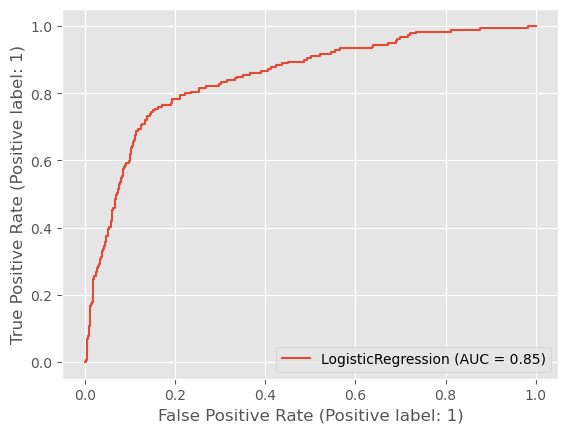

In [37]:
logr_disp = RocCurveDisplay.from_estimator(logr, X_test, y_test)
plt.show()

## Classifier comparison

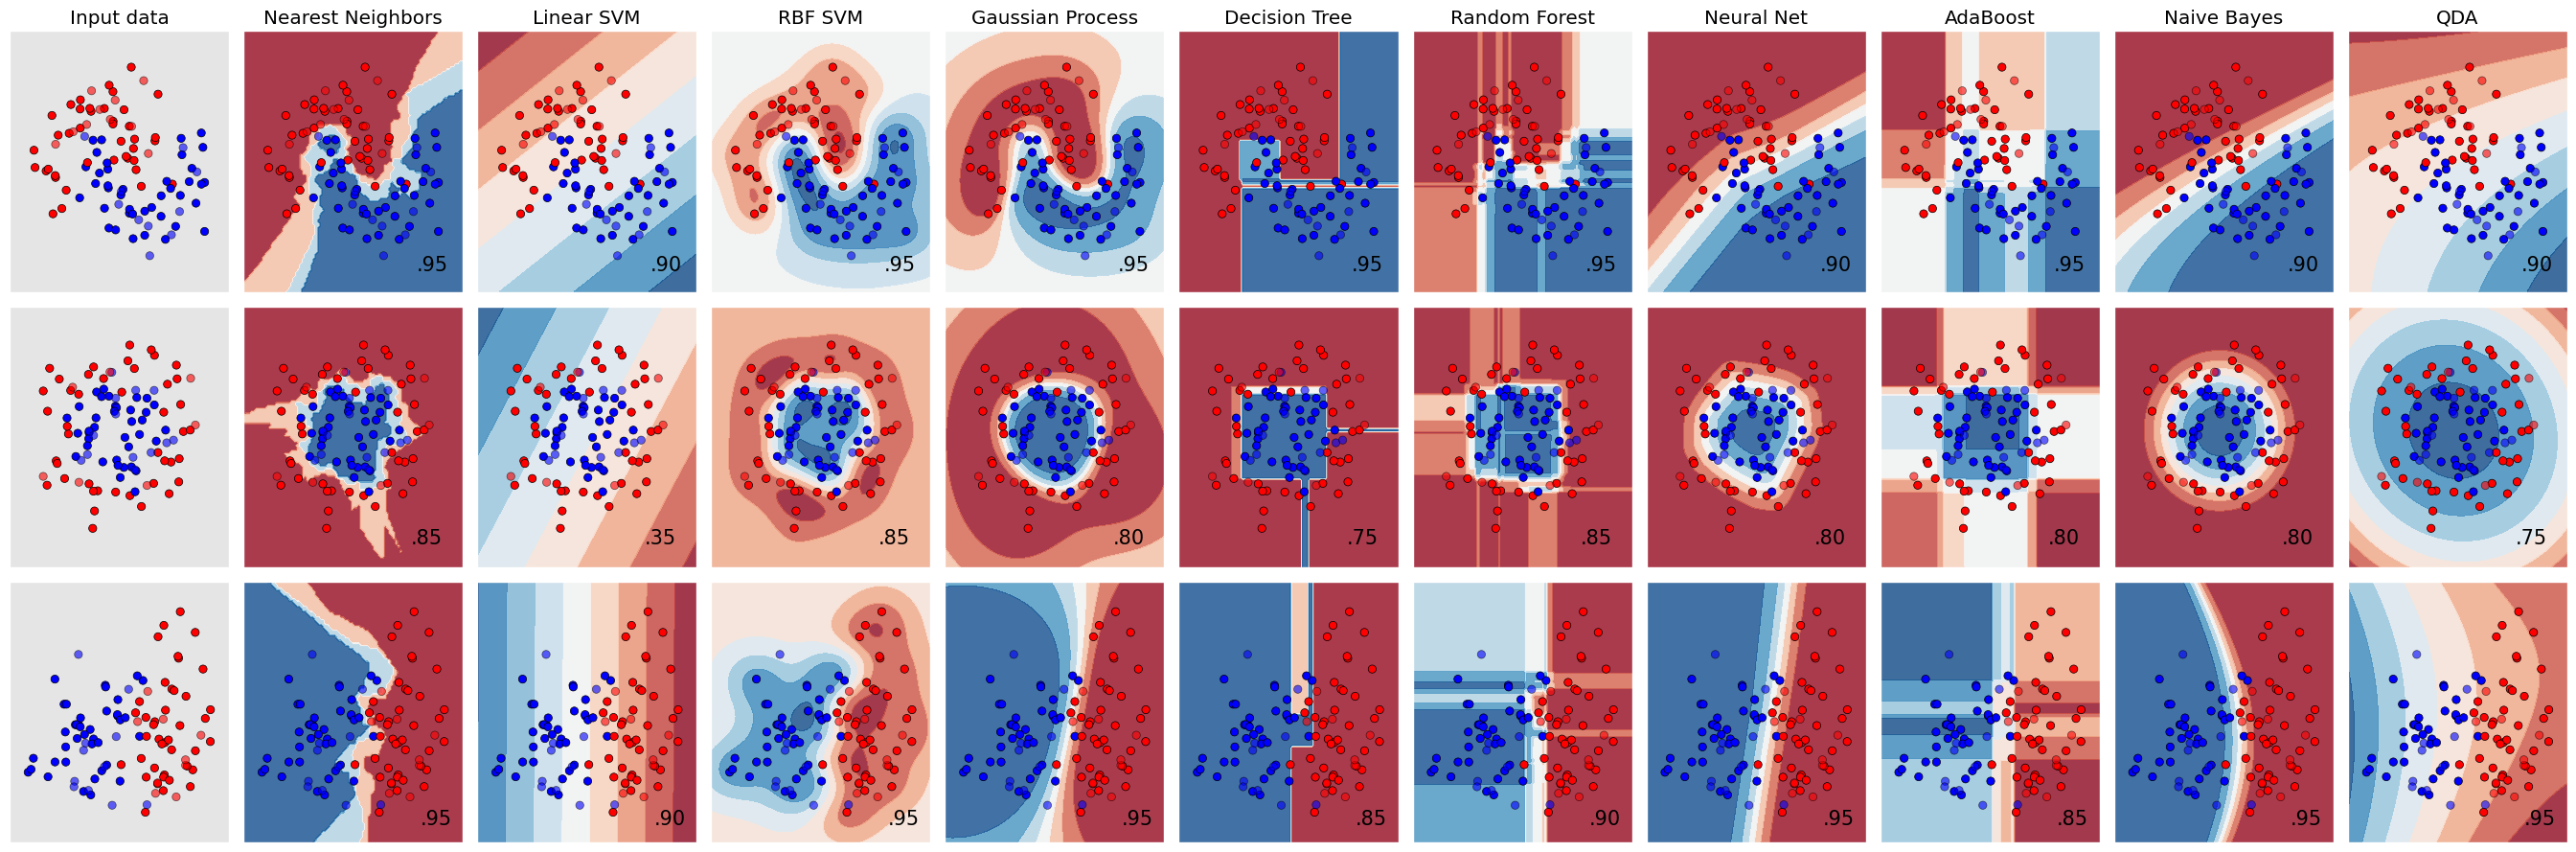

In [38]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

from sklearn.datasets import make_circles, make_classification, make_moons
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

names = [
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=42),
    SVC(gamma=2, C=1, random_state=42),
    GaussianProcessClassifier(1.0 * RBF(1.0), random_state=42),
    DecisionTreeClassifier(max_depth=5, random_state=42),
    RandomForestClassifier(
        max_depth=5, n_estimators=10, max_features=1, random_state=42
    ),
    MLPClassifier(alpha=1, max_iter=1000, random_state=42),
    AdaBoostClassifier(algorithm="SAMME", random_state=42),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(x_min, x_max)
    ax.set_ylim(y_min, y_max)
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)

        clf = make_pipeline(StandardScaler(), clf)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        DecisionBoundaryDisplay.from_estimator(
            clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
        )

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            x_max - 0.3,
            y_min + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()